# Data Import & Preprocessing

In [1]:
!pip install feature_engine
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from feature_engine.creation import CyclicalFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation, Dropout
from keras import layers
from google.colab import drive
import warnings
warnings.filterwarnings(action='ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 290 kB 6.5 MB/s 


In [2]:
drive.mount('/content/drive/', force_remount=True)
fileName = "/content/drive/My Drive/Dataset.xlsx"
df_Labels = pd.read_excel(fileName, sheet_name="Plant_1_Data")
df_Labels = df_Labels.drop(['PLANT_ID'], axis=1)
df_Labels["DATE_TIME"] = pd.to_datetime(df_Labels.DATE_TIME)
df_Features = pd.read_excel(fileName, sheet_name="Plant_1_Sensor_Data")
df_Features = df_Features.drop(['PLANT_ID','SOURCE_KEY'], axis=1)
df_Features['DATE_TIME'] = pd.to_datetime(df_Features.DATE_TIME)
print(df_Features.head())

Mounted at /content/drive/
            DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
0 2020-05-15 00:00:00            25.184316           22.857507          0.0
1 2020-05-15 00:15:00            25.084589           22.761668          0.0
2 2020-05-15 00:30:00            24.935753           22.592306          0.0
3 2020-05-15 00:45:00            24.846130           22.360852          0.0
4 2020-05-15 01:00:00            24.621525           22.165423          0.0


In [3]:
df_Learn = pd.merge(df_Features, df_Labels, how='inner', left_on = ['DATE_TIME'], right_on = ['DATE_TIME'])

In [4]:
'''sourceKeyList = list(df_Learn['SOURCE_KEY'].unique())
sourceKeyDict = {}
for key in sourceKeyList:
  df_Key = df_Learn[df_Learn['SOURCE_KEY'] == key]
  #print(df_Key.describe())
  X = df_Key.drop(['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'SOURCE_KEY'], axis = 1)
  #print(X.describe())
  y = df_Key['DC_POWER']
  
  #Train Val Test Split: 80%, 10%, 10%
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=42)
  #print(X_train.head()) print(y_train)
  sourceKeyDict[key] = list([X_train, y_train, X_val, y_val, X_test, y_test])
len(sourceKeyDict)
'''
tf.random.set_seed(42)
X = df_Learn.drop(['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD'], axis = 1)
X['hour'] = X['DATE_TIME'].dt.hour
X['min'] = X['DATE_TIME'].dt.minute
X = X.drop(['DATE_TIME'], axis = 1)
y = np.log(df_Learn['DC_POWER'] + 1)
display(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
cols_to_scale = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
scaler = StandardScaler()
scaler.fit(X_train[cols_to_scale])
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
display(X_train)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=42)

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY,hour,min
0,25.184316,22.857507,0.0,1BY6WEcLGh8j5v7,0,0
1,25.184316,22.857507,0.0,1IF53ai7Xc0U56Y,0,0
2,25.184316,22.857507,0.0,3PZuoBAID5Wc2HD,0,0
3,25.184316,22.857507,0.0,7JYdWkrLSPkdwr4,0,0
4,25.184316,22.857507,0.0,McdE0feGgRqW7Ca,0,0
...,...,...,...,...,...,...
45675,21.909288,20.427972,0.0,uHbuxQJl8lW7ozc,23,45
45676,21.909288,20.427972,0.0,wCURE6d3bPkepu2,23,45
45677,21.909288,20.427972,0.0,z9Y9gH1T5YWrNuG,23,45
45678,21.909288,20.427972,0.0,zBIq5rxdHJRwDNY,23,45


,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY,hour,min
31161,-0.670111,-0.793333,-0.772531,1IF53ai7Xc0U56Y,1,45
43720,-0.883306,-0.822172,-0.772531,zBIq5rxdHJRwDNY,1,0
14303,1.518744,1.818756,1.887604,uHbuxQJl8lW7ozc,13,0
21089,-0.240173,-0.540894,-0.772531,ZoEaEvLYb1n2sOq,21,30
20303,1.794998,2.120042,2.383081,rGa61gmuvPhdLxV,12,30
...,...,...,...,...,...,...
11284,1.576698,1.931014,2.173641,sjndEbLyjtCKgGv,13,15
44732,0.748897,0.922154,0.825447,zBIq5rxdHJRwDNY,13,0
38158,0.123579,0.902551,1.139332,3PZuoBAID5Wc2HD,10,0
860,0.763700,1.636051,1.416952,1BY6WEcLGh8j5v7,10,0


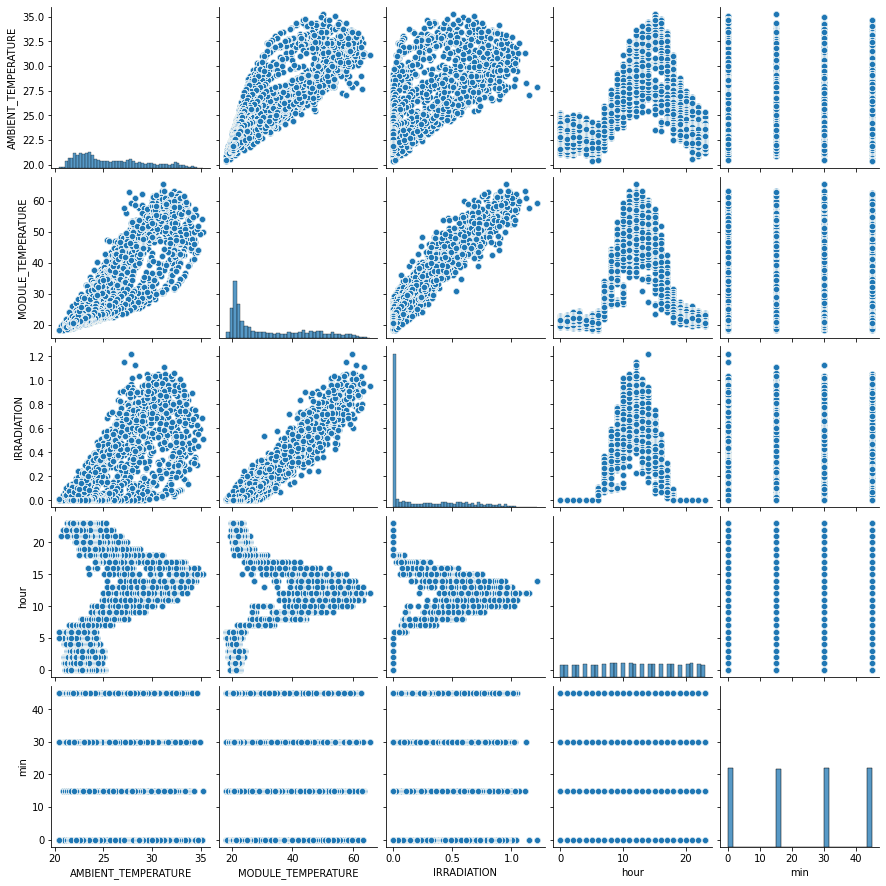

In [5]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(X)

# Feature Manipulation

In [6]:
cyclical = CyclicalFeatures(variables=['hour', 'min'], drop_original=True)
#display(X_train)
cyclical.fit(X_train)
X_train = cyclical.transform(X_train)
X_test = cyclical.transform(X_test)

display(X_train.head().T, y_train)

,31161,43720,14303,21089,20303
AMBIENT_TEMPERATURE,-0.670111,-0.883306,1.518744,-0.240173,1.794998
MODULE_TEMPERATURE,-0.793333,-0.822172,1.818756,-0.540894,2.120042
IRRADIATION,-0.772531,-0.772531,1.887604,-0.772531,2.383081
SOURCE_KEY,1IF53ai7Xc0U56Y,zBIq5rxdHJRwDNY,uHbuxQJl8lW7ozc,ZoEaEvLYb1n2sOq,rGa61gmuvPhdLxV
hour_sin,0.269797,0.269797,-0.398401,-0.519584,-0.136167
hour_cos,0.962917,0.962917,-0.917211,0.854419,-0.990686
min_sin,-0.0,0.0,0.0,-0.866025,-0.866025
min_cos,1.0,1.0,1.0,-0.5,-0.5


31161    0.000000
43720    0.000000
14303    9.138860
21089    0.000000
20303    9.443068
           ...   
11284    9.418736
44732    8.812865
38158    9.096355
860      8.701076
15795    8.956383
Name: DC_POWER, Length: 41112, dtype: float64

In [7]:
df = X_train.drop(['SOURCE_KEY'], axis=1)
features = X_train.drop(['SOURCE_KEY'], axis=1).columns

pca = PCA()
components = pca.fit_transform(df[features])
#X_train = (pd.DataFrame(components, columns = features))
#X_test = pd.DataFrame(pca.transform(X_test.drop(["SOURCE_KEY"], axis = 1)), columns = features)
#display(X_test)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(2)
)
fig.update_traces(diagonal_visible=False)
fig.show()

# Model Training

In [8]:
regr = MLPRegressor(hidden_layer_sizes=(20, 15, 10, 4), verbose = True, random_state=42, activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, tol=0.0001, early_stopping=True).fit(X_train.drop(['SOURCE_KEY'], axis = 1), y_train)
regr.score(X_test.drop(['SOURCE_KEY'], axis = 1), y_test)
model = Sequential()
model.add(Input(7, name="input"))
model.add(Dense(40, activation='tanh', name='layer1'))
model.add(Dropout(0.03))
model.add(Dense(30, activation='tanh', name='layer2'))
model.add(Dense(20, activation='relu', name='layer3'))
model.add(Dense(15, activation='relu', name='layer4'))
model.add(Dense(10, activation='relu', name='layer5'))
model.add(Dense(4, activation='relu', name='layer6'))
model.add(Dense(1, activation = 'linear'))

callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/My Drive/Colab Notebooks/checkpoint2/best_weights', save_weights_only=True, monitor='val_loss', mode='min', save_best_only=True)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=tf.keras.metrics.MeanSquaredLogarithmicError())
history = model.fit(X_train.drop(['SOURCE_KEY'], axis = 1), y_train, epochs=80, batch_size=360, validation_split=0.1, callbacks=callback)



Iteration 1, loss = 8.05674520
Validation score: 0.818785
Iteration 2, loss = 0.78205932
Validation score: 0.958894
Iteration 3, loss = 0.27531496
Validation score: 0.975722
Iteration 4, loss = 0.18769066
Validation score: 0.980273
Iteration 5, loss = 0.15495670
Validation score: 0.983699
Iteration 6, loss = 0.14050922
Validation score: 0.985896
Iteration 7, loss = 0.12822148
Validation score: 0.987028
Iteration 8, loss = 0.11945402
Validation score: 0.987714
Iteration 9, loss = 0.11235642
Validation score: 0.988659
Iteration 10, loss = 0.10662436
Validation score: 0.989058
Iteration 11, loss = 0.10272723
Validation score: 0.990018
Iteration 12, loss = 0.09988774
Validation score: 0.990365
Iteration 13, loss = 0.09929626
Validation score: 0.990767
Iteration 14, loss = 0.09486277
Validation score: 0.991109
Iteration 15, loss = 0.09107193
Validation score: 0.991463
Iteration 16, loss = 0.09116163
Validation score: 0.991580
Iteration 17, loss = 0.08810872
Validation score: 0.991863
Iterat

In [9]:
model.load_weights('/content/drive/My Drive/Colab Notebooks/checkpoint2/best_weights')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 40)                320       
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 layer2 (Dense)              (None, 30)                1230      
                                                                 
 layer3 (Dense)              (None, 20)                620       
                                                                 
 layer4 (Dense)              (None, 15)                315       
                                                                 
 layer5 (Dense)              (None, 10)                160       
                                                                 
 layer6 (Dense)              (None, 4)                 4

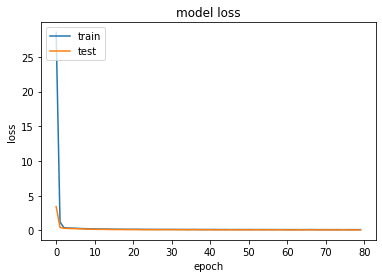

In [10]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
#display(X_test)
vals = pd.DataFrame([[pd.to_datetime('2020-05-15 12:30:00'), '32.14768473',	'52.35325513',	'0.6492476293', 'HmiyD2TTLFNqkNe']], columns=('DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'SOURCE_KEY'))
#display(vals)
vals['hour'] = vals['DATE_TIME'].dt.hour
vals['min'] = vals['DATE_TIME'].dt.minute
vals = vals.drop(['DATE_TIME'], axis = 1)
display(vals)
vals[cols_to_scale] = scaler.transform(vals[cols_to_scale])
vals = cyclical.transform(vals)
vals = vals.drop(['SOURCE_KEY'], axis = 1)
#display(vals)
predicted_value = np.exp(model.predict(vals)) - 1
if predicted_value < 0:
  predicted_value = 0.0
display("DC_POWER Prediction for sample: " + str(predicted_value))

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY,hour,min
0,32.14768473,52.35325513,0.6492476293,HmiyD2TTLFNqkNe,12,30


1/1 [==============================] - 0s 120ms/step


'DC_POWER Prediction for sample: [[9353.251]]'

In [21]:
pred = model.predict(X_test.drop(['SOURCE_KEY'], axis = 1))
pred[pred < 0] = 0.0
mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
msle = mean_squared_log_error(y_test, pred)
print("Mean Squared Logarithmic Error:", msle)

143/143 [==============================] - 0s 1ms/step
Mean Absolute Error: 0.07099342161242042
Root Mean Squared Error: 0.28982736136548326
Mean Squared Logarithmic Error: 0.010333934571975704


# Significance Tests
Two tailed Student-T Test for y_test and pred with the number of samples in each being 4568 at a 95% significance level. We choose the T Test since population variance is unknown.

In [22]:
display("Size of samples: " + str(len(y_test)))
#Variance check for two tailed test
display("Variance of Predicted Samples: " + str(np.var(np.exp(pred) - 1)), "Variance of Ground Truth: " + str(np.var(np.exp(y_test)) - 1))
display("Standard Deviation of the Predicted Sample: " + str(np.exp(np.sqrt(np.var(pred)))))
#Ratio
display("Ratio to check for nearly equal Variance: " + str(np.var(pred)/np.var(y_test)))

'Size of samples: 4568'

'Variance of Predicted Samples: 16856038.0'

'Variance of Ground Truth: 16790436.655372243'

'Standard Deviation of the Predicted Sample: 67.08291'

'Ratio to check for nearly equal Variance: 1.0007330970054877'

In [23]:
#T-Test
#Equal Variance, hence equal_var = 'True'
tstat, t_pval = stats.ttest_ind(a=pred, b=y_test, equal_var=True)

display("T-Statistic: " + str(tstat.round(3)), "PValue: " + str(t_pval.round(3)))

'T-Statistic: [0.169]'

'PValue: [0.866]'

With such a high P-value >> α=0.025, we cannot reject the null hypothesis, the means of the two samples are equal.

In [24]:
pred_SK = regr.predict(X_test.drop(['SOURCE_KEY'], axis = 1))
pred_SK[pred_SK < 0] = 0.0

tstat, t_pval = stats.ttest_ind(a=pred, b=pred_SK, equal_var=True)

display("T-Statistic: " + str(tstat.round(3)), "PValue: " + str(t_pval.round(3)))

'T-Statistic: [0.058]'

'PValue: [0.954]'

The Sci-Kit Learn Estimator and the Deep Neural Network Architecture have predicted value outcomes with a P-Value of 0.954 for the two-tailed Student T Test, thus showing that the estimators are statistically identical with a probability of 95.4%.